<a href="https://colab.research.google.com/github/Gheras13/Homework/blob/main/Homework_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HOMEWOWRK_2  CAR RACING

#Import

In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import zipfile

#Caricamento dataset

In [29]:

# Percorsi dei file ZIP
train_path = "/content/train/train"
test_path = "/content/test/test"


# Estrazione file
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/train")

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/test")

print("Contenuto train:", os.listdir(train_path))
print("Contenuto test:", os.listdir(test_path))


Contenuto train: ['4', '1', '0', '3', '2']
Contenuto test: ['4', '1', '0', '3', '2']


In [31]:


def load_custom_dataset(train_path, test_path, image_size=(96, 96)):
    # Carica le immagini da directory
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_path,
        image_size=image_size,
        batch_size=None,
        label_mode='int'
    )

    test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_path,
        image_size=image_size,
        batch_size=None,
        label_mode='int'
    )

    # Conversione in tensori
    Xtrain = np.array([img.numpy() for img, _ in train_dataset])
    Ytrain = np.array([label.numpy() for _, label in train_dataset])
    Xtest = np.array([img.numpy() for img, _ in test_dataset])
    Ytest = np.array([label.numpy() for _, label in test_dataset])

    input_shape = (image_size[0], image_size[1], 3)
    num_classes = len(np.unique(Ytrain))

    print("Training input shape:", Xtrain.shape)
    print("Training output shape:", Ytrain.shape)
    print("Test input shape:", Xtest.shape)
    print("Test output shape:", Ytest.shape)
    print("Input shape:", input_shape)
    print("Number of classes:", num_classes)

    # Normalizzazione delle immagini tra [0,1]
    Xtrain = Xtrain / 255.0
    Xtest = Xtest / 255.0

    #one-hot encoding
    Ytrain = tf.keras.utils.to_categorical(Ytrain, num_classes)
    Ytest = tf.keras.utils.to_categorical(Ytest, num_classes)

    return [Xtrain, Ytrain, Xtest, Ytest, input_shape, num_classes]

# Percorsi delle cartelle
train_path = "/content/train/train"
test_path = "/content/test/test"

# Carica i dati
[Xtrain, Ytrain, Xtest, Ytest, input_shape, num_classes] = load_custom_dataset(train_path, test_path)


Found 6369 files belonging to 5 classes.
Found 2749 files belonging to 5 classes.
Training input shape: (6369, 96, 96, 3)
Training output shape: (6369,)
Test input shape: (2749, 96, 96, 3)
Test output shape: (2749,)
Input shape: (96, 96, 3)
Number of classes: 5


#Immagine casuale

4


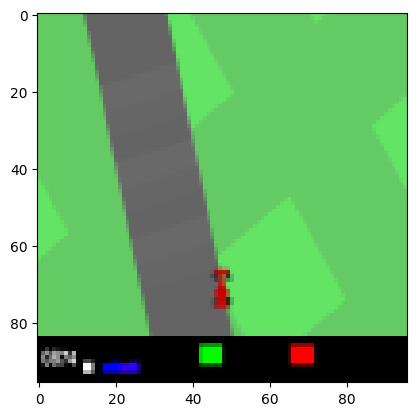

In [36]:
i = random.randrange(0,Xtrain.shape[0])
image = Xtrain[i]
image = np.array(image, dtype='float')

label = Ytrain[i].argmax()
print(label)

plt.imshow(image, cmap='Greens')
plt.show()
